# 4-Dimensional Variational Autoencoder analysis. MILES stellar library

Data download: http://svocats.cab.inta-csic.es/miles/index.php?action=credits
#### ACKNOWLEDGMENT
This work is based on data from the MILES service developed by the Spanish Virtual Observatory in the framework of the IAU Comission G5 Working Group : Spectral Stellar Libraries.

In [1]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np

import os
from pathlib import Path

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

In [3]:
root = '## YOUR FOLDER PATH TO THE DOWNLOADED SPECTRA ##'

## Checking the data

In [4]:
file = "/## YOUR FOLDER PATH TO THE DOWNLOADED SPECTRA ##/miles_spec_fits_s0597.fits"

sp = fits.open(file)
print('\n\nHeader of the spectrum :\n\n', sp[0].header, '\n\n')

flux2 = np.zeros(sp[0].header['NAXIS1'], dtype=float)

flux2 = np.array(sp[0].data)
flux_norm = flux2/(np.nanmax(flux2))

wave2 = np.ones(sp[0].header['NAXIS1'], dtype=float)
for i in range(sp[0].header['NAXIS1']):
    wave2[i] = sp[0].header['CRVAL1'] + i*sp[0].header['CDELT1']
    
flux_ok = np.reshape(flux_norm, (sp[0].header['NAXIS1']))



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 4367 / length of data axis 1                          NAXIS2  =                    1 / length of data axis 2                          COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H COMMENT ----------------------------------------------------------------------  COMMENT ************************** REDUCEME HEADER ***************************  COMMENT ----------------------------------------------------------------------  HISTORY Date: 06/10/**                                                          CRPIX1  =                 1.00                                                  CRVAL1  =  

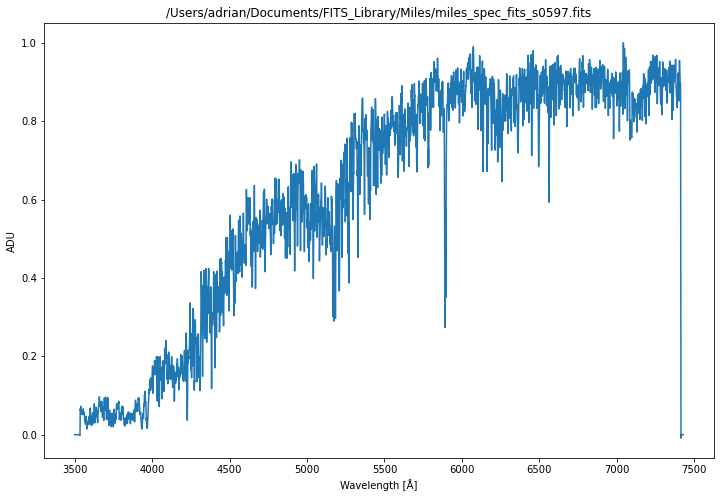

In [5]:
fig = plt.figure(1, figsize=(12, 8))
plt.plot(wave2, flux_ok)
plt.xlabel('Wavelength [Å]')
plt.ylabel('ADU')
plt.title(file)
plt.show()

## Generating a custom set with the complete library


In [6]:
num = 1
dim1 = sp[0].header['NAXIS1']
#dim2=1

for path, subdirs, files in os.walk(root):
    for nanme in files:
        num += 1
print(num)
print(dim1)

985
4367


In [7]:
curves = 0
custom_set = np.zeros((num, dim1))
label_set = np.zeros((num, ), dtype=int)
spectra_set = [''] * num 

for path, subdirs, files in os.walk(root):
    for name in files:
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')

        data, header = fits.getdata(Ffile, header=True)
        hdu_number = 0
        fits.getheader(Ffile, hdu_number)
        fits_file = Ffile
        
        with fits.open(fits_file, mode='readonly') as hdulist:
            hdulist.info()
            data = np.array(hdulist[0].data)
             
            data_norm = np.reshape(data/(np.nanmax(data)), (sp[0].header['NAXIS1']))

            
            label_set[curves] = curves 
            spectra_set[curves] = name
            for i in range (dim1):
                custom_set[curves,i] = (data_norm[i])
        hdulist.close   
        curves += 1
               
        print ("Spectra loaded:",curves+1, "spectra");


Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0597.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 2 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0981.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 3 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0578.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 4 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0082.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 5 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits

Spectra loaded: 37 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0903.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 38 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0450.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 39 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0779.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 40 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0283.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 41 spectra
Filename: /Users/adrian/Documents/FIT

Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0061.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 73 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0431.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 74 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0124.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 75 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0574.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 76 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_

Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0372.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 108 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0688.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 109 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0667.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 110 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0237.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 111 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_s

Spectra loaded: 142 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0518.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 143 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0148.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 144 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0324.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 145 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0774.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 146 spectra
Filename: /Users/adrian/Document

Spectra loaded: 177 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0719.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 178 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0349.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 179 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0294.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 180 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0781.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 181 spectra
Filename: /Users/adrian/Document

Spectra loaded: 212 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0902.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 213 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 214 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0451.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 215 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0646.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 216 spectra
Filename: /Users/adrian/Document

Spectra loaded: 247 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0129.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 248 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0067.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 249 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0437.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 250 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0964.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 251 spectra
Filename: /Users/adrian/Document

Spectra loaded: 282 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0266.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 283 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0636.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 284 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0909.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 285 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0724.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 286 spectra
Filename: /Users/adrian/Document

Spectra loaded: 317 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0745.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 318 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0315.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 319 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0883.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 320 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0929.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 321 spectra
Filename: /Users/adrian/Document

Spectra loaded: 352 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0397.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 353 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0801.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 354 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0102.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 355 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0552.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 356 spectra
Filename: /Users/adrian/Document

Spectra loaded: 387 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0416.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 388 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0945.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 389 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0379.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 390 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0683.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 391 spectra
Filename: /Users/adrian/Document

Spectra loaded: 422 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0494.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 423 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0601.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 424 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0251.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 425 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0744.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 426 spectra
Filename: /Users/adrian/Document

Spectra loaded: 457 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0908.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 458 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0322.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 459 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0772.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 460 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0288.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 461 spectra
Filename: /Users/adrian/Document

Spectra loaded: 492 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0573.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 493 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0089.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 494 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0858.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 495 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0622.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 496 spectra
Filename: /Users/adrian/Document

Spectra loaded: 527 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0862.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 528 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0927.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 529 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0024.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 530 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0474.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 531 spectra
Filename: /Users/adrian/Document

Spectra loaded: 562 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0415.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 563 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 564 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0550.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 565 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0803.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 566 spectra
Filename: /Users/adrian/Document

Spectra loaded: 597 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0028.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 598 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0881.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 599 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0747.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 600 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0317.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 601 spectra
Filename: /Users/adrian/Document

Spectra loaded: 632 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0253.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 633 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0496.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 634 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0479.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 635 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0183.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 636 spectra
Filename: /Users/adrian/Document

Spectra loaded: 667 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0947.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 668 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0044.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 669 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0414.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 670 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0101.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 671 spectra
Filename: /Users/adrian/Document

Spectra loaded: 702 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0160.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 703 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0530.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 704 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0863.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 705 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0926.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 706 spectra
Filename: /Users/adrian/Document

Spectra loaded: 737 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0336.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 738 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0859.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 739 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0278.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 740 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0782.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 741 spectra
Filename: /Users/adrian/Document

Spectra loaded: 772 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0844.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 773 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0147.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 774 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0517.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 775 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0700.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 776 spectra
Filename: /Users/adrian/Document

Spectra loaded: 807 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0595.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 808 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0018.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 809 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0448.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 810 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0624.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 811 spectra
Filename: /Users/adrian/Document

Spectra loaded: 842 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0537.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 843 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0022.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 844 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0472.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 845 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0188.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 846 spectra
Filename: /Users/adrian/Document

Spectra loaded: 877 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0865.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 878 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0166.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 879 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0536.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 880 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 881 spectra
Filename: /Users/adrian/Document

Spectra loaded: 912 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0760.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 913 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0330.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 914 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0019.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 915 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0449.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 916 spectra
Filename: /Users/adrian/Document

Spectra loaded: 947 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0644.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 948 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0214.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 949 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 950 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0453.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 951 spectra
Filename: /Users/adrian/Document

Spectra loaded: 982 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0783.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 983 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0629.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 984 spectra
Filename: /Users/adrian/Documents/FITS_Library/Miles/miles_spec_fits_s0296.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   
Spectra loaded: 985 spectra


## Splitting the dataset

In [8]:
label_set = np.asarray(label_set)

In [9]:
dataset = tf.data.Dataset.from_tensor_slices((custom_set, label_set))
dataset.element_spec

2022-08-07 13:09:55.231686: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(TensorSpec(shape=(4367,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(custom_set,label_set,test_size=0.2,random_state=123)

In [12]:
len(custom_set)

985

In [13]:
len(x_train)

788

In [14]:
len(x_test)

197

## VAE Definition

In [15]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim), mean=0., stddev=0.1)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [16]:
original_dim = dim1
latent_dim = 4
intermediate_dim = dim1/8
intermediate_dim2 = intermediate_dim/8
intermediate_dim3 = intermediate_dim2/8
intermediate_dim4 = intermediate_dim3/latent_dim



In [17]:
original_inputs = tf.keras.Input(shape=(original_dim,), name="encoder_input")
x1 = layers.Dense(intermediate_dim, activation="relu")(original_inputs)
x2 = layers.Dense(intermediate_dim2, activation="relu")(x1)
x3 = layers.Dense(intermediate_dim2, activation="relu")(x2)
x4 = layers.Dense(intermediate_dim2, activation="relu")(x3)



z_mean = layers.Dense(latent_dim, name="z_mean")(x4)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x4)
z = Sampling()((z_mean, z_log_var))
encoder = tf.keras.Model(inputs=original_inputs, outputs=z, name="encoder")

In [18]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 4367)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 545)          2380560     ['encoder_input[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 68)           37128       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 68)           4692        ['dense_1[0][0]']                
                                                                                            

In [19]:
# Define decoder model.
latent_inputs = tf.keras.Input(shape=(latent_dim,), name="z_sampling")
x5 = layers.Dense(intermediate_dim2, activation="relu")(latent_inputs)
x6 = layers.Dense(intermediate_dim2, activation="relu")(x5)
x7 = layers.Dense(intermediate_dim2, activation="relu")(x6)
x8 = layers.Dense(intermediate_dim, activation="relu")(x7)


outputs = layers.Dense(original_dim, activation="sigmoid")(x8)
decoder = tf.keras.Model(inputs=latent_inputs, outputs=outputs, name="decoder")

In [20]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 4)]               0         
                                                                 
 dense_4 (Dense)             (None, 68)                340       
                                                                 
 dense_5 (Dense)             (None, 68)                4692      
                                                                 
 dense_6 (Dense)             (None, 68)                4692      
                                                                 
 dense_7 (Dense)             (None, 545)               37605     
                                                                 
 dense_8 (Dense)             (None, 4367)              2384382   
                                                                 
Total params: 2,431,711
Trainable params: 2,431,711
Non-tra

In [21]:
outputs = decoder(z)
vae2 = tf.keras.Model(inputs=original_inputs, outputs=outputs, name="DeepVAE2")

In [22]:
vae2.summary()

Model: "DeepVAE2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 4367)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 545)          2380560     ['encoder_input[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 68)           37128       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 68)           4692        ['dense_1[0][0]']                
                                                                                           

In [23]:
# Add KL divergence regularization loss.
kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
vae2.add_loss(kl_loss)

In [24]:
vae2.summary()

Model: "DeepVAE2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 4367)]       0           []                               
                                                                                                  
 dense (Dense)                  (None, 545)          2380560     ['encoder_input[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 68)           37128       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 68)           4692        ['dense_1[0][0]']                
                                                                                           

In [25]:
# Train.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae2.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
vae2.fit(x_train, x_train, epochs=100, batch_size=2)

Epoch 1/100
394/394 [==============================] - 4s 9ms/step - loss: 0.0772
Epoch 2/100
394/394 [==============================] - 4s 9ms/step - loss: 0.0428
Epoch 3/100
394/394 [==============================] - 3s 9ms/step - loss: 0.0310
Epoch 4/100
394/394 [==============================] - 4s 9ms/step - loss: 0.0290
Epoch 5/100
394/394 [==============================] - 4s 9ms/step - loss: 0.0246
Epoch 6/100
394/394 [==============================] - 4s 9ms/step - loss: 0.0260
Epoch 7/100
394/394 [==============================] - 3s 9ms/step - loss: 0.0227
Epoch 8/100
394/394 [==============================] - 4s 9ms/step - loss: 0.0237
Epoch 9/100
394/394 [==============================] - 4s 9ms/step - loss: 0.0254
Epoch 10/100
394/394 [==============================] - 4s 9ms/step - loss: 0.0247
Epoch 11/100
394/394 [==============================] - 4s 9ms/step - loss: 0.0215
Epoch 12/100
394/394 [==============================] - 4s 10ms/step - loss: 0.0237
Epoch 13/100

In [26]:
encoded_test = encoder(x_test)

In [27]:
tf.shape(encoded_test)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([197,   4], dtype=int32)>

In [28]:
encoded_test

<tf.Tensor: shape=(197, 4), dtype=float32, numpy=
array([[ 0.01187059, -0.19740352, -0.08063229,  0.20248948],
       [ 0.05409539, -0.17230934,  0.13082308,  0.07945063],
       [ 0.15587233,  0.32166353,  0.03550078, -0.24784517],
       [-0.17616485,  0.04877977, -0.19578889,  0.01768285],
       [ 0.01634997, -0.22996032, -0.02087038, -0.00460654],
       [-0.08055836, -0.13829598, -0.12322433,  0.38438243],
       [-0.00564419, -0.18022141, -0.07752136, -0.13498466],
       [ 0.24385113, -0.23283854, -0.0331932 , -0.33716837],
       [-0.05418254, -0.05762871, -0.17863515,  0.08042338],
       [-0.14619616, -0.02956206,  0.06043944, -0.23126215],
       [ 0.22877526,  0.07388659,  0.0297051 ,  0.21571381],
       [ 0.05201674,  0.09216765,  0.06041598, -0.06953938],
       [ 0.06364739,  0.08633827,  0.22235543,  0.15750049],
       [ 0.00596454,  0.03431547, -0.11001938,  0.16085568],
       [-0.0713658 , -0.17100465, -0.19396383, -0.16401184],
       [-0.03911736, -0.37288198, -

In [29]:
encoded_imgs_test=encoded_test.numpy()

In [30]:
decoded_test = vae2(x_test)

In [31]:
decoded_test

<tf.Tensor: shape=(197, 4367), dtype=float32, numpy=
array([[0.00395336, 0.00399418, 0.00393791, ..., 0.00383722, 0.00380759,
        0.003907  ],
       [0.00162607, 0.00163672, 0.00166298, ..., 0.00167208, 0.00166057,
        0.00172104],
       [0.00043662, 0.00042057, 0.00046388, ..., 0.00186884, 0.00181541,
        0.0006342 ],
       ...,
       [0.00275568, 0.00273766, 0.00276556, ..., 0.00387238, 0.00385319,
        0.00308549],
       [0.00070281, 0.0007017 , 0.00067214, ..., 0.0006838 , 0.00068704,
        0.00068313],
       [0.00063335, 0.00064741, 0.00063331, ..., 0.00052895, 0.00051533,
        0.00060616]], dtype=float32)>

In [32]:
tf.shape(decoded_test)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 197, 4367], dtype=int32)>

In [33]:
decoded_imgs_test=decoded_test.numpy()

In [34]:
decoded_imgs_test.shape

(197, 4367)

Text(0.5, 0, 'Decoded Spectra')

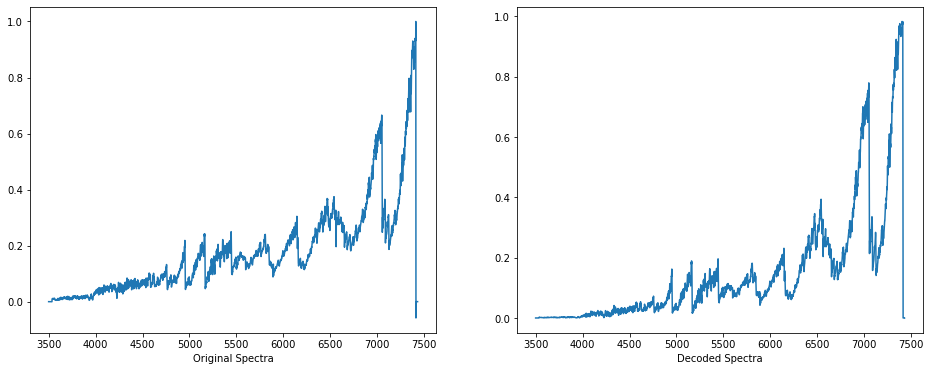

In [35]:
figure = 157
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(wave2, x_test[figure])
ax[0].set_xlabel('Original Spectra')   
ax[1].plot(wave2, decoded_imgs_test[figure])
ax[1].set_xlabel('Decoded Spectra')

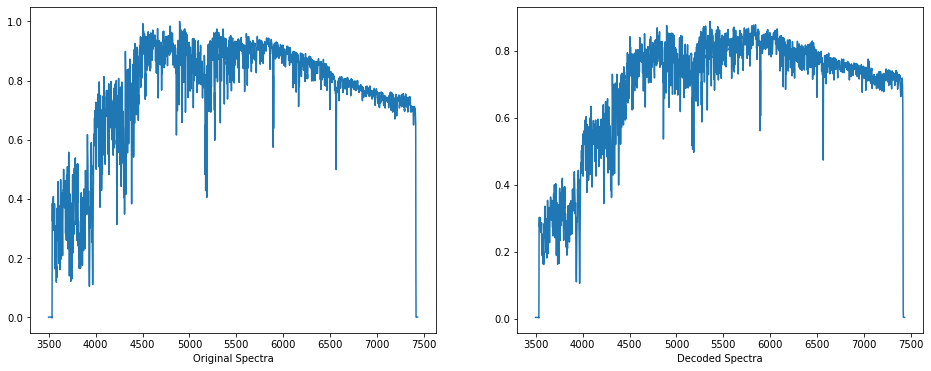

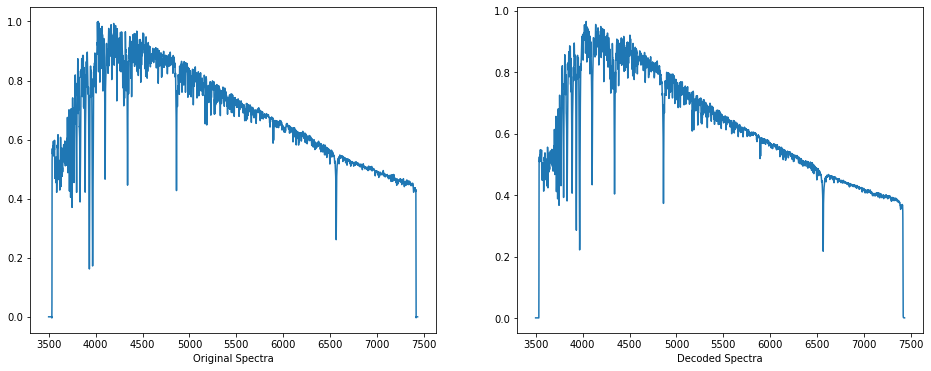

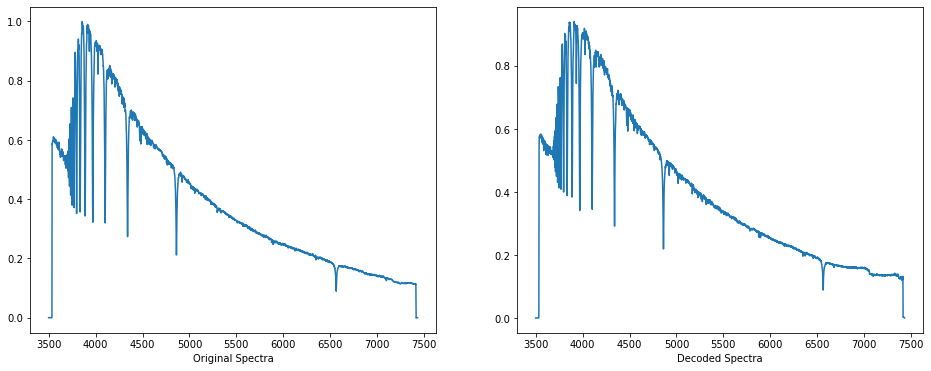

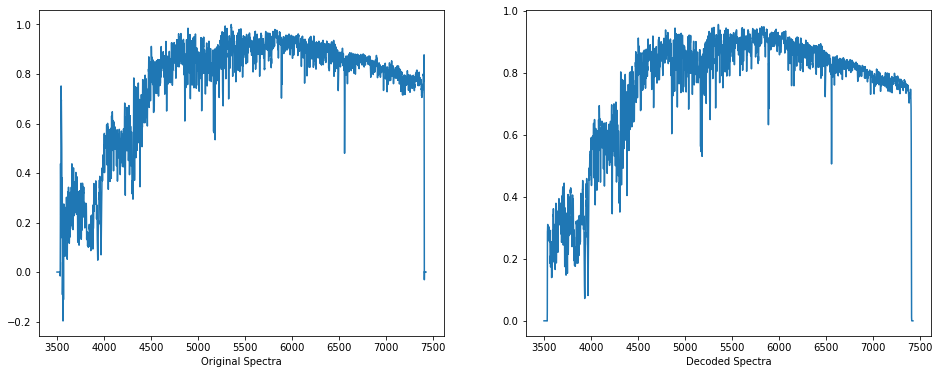

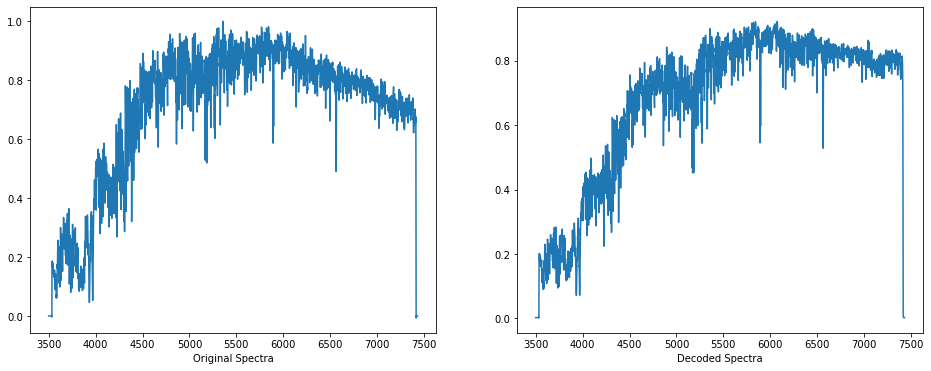

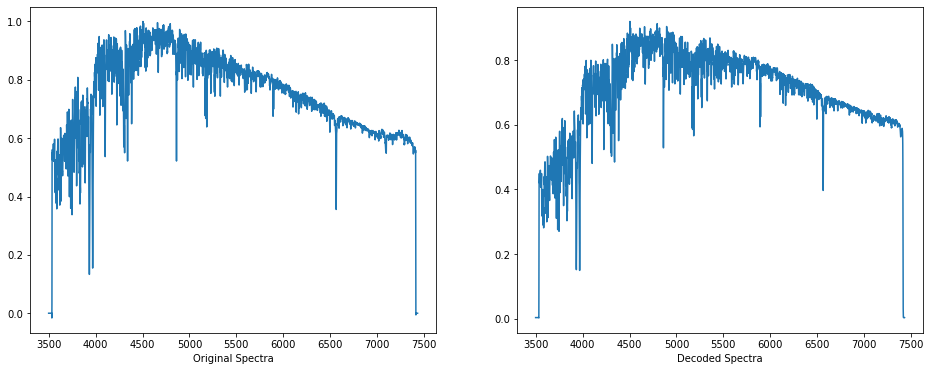

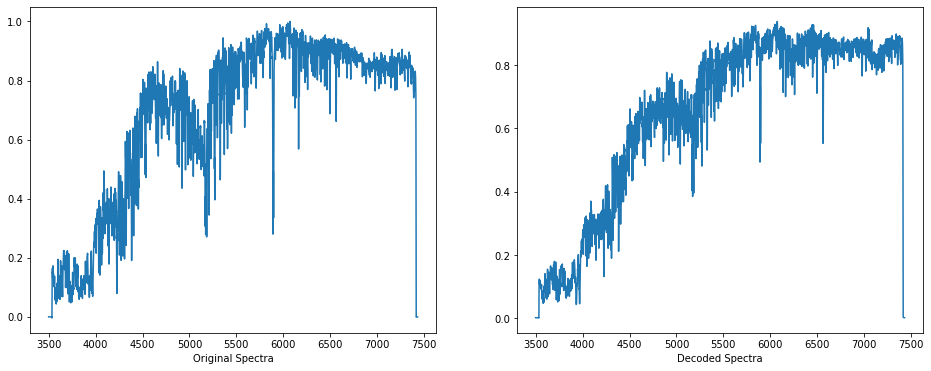

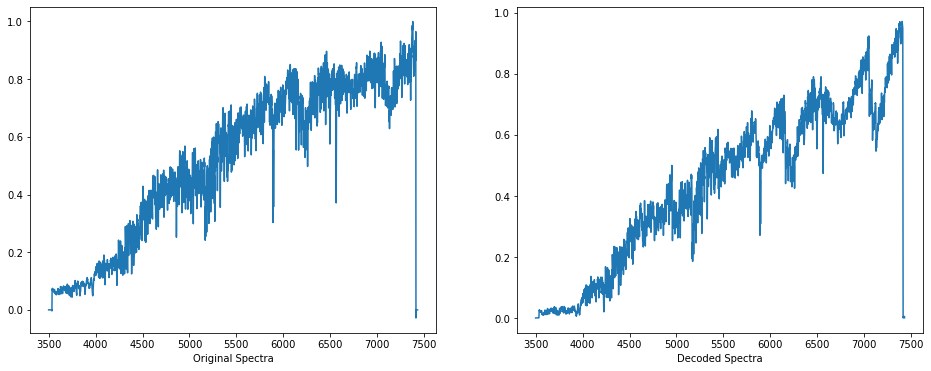

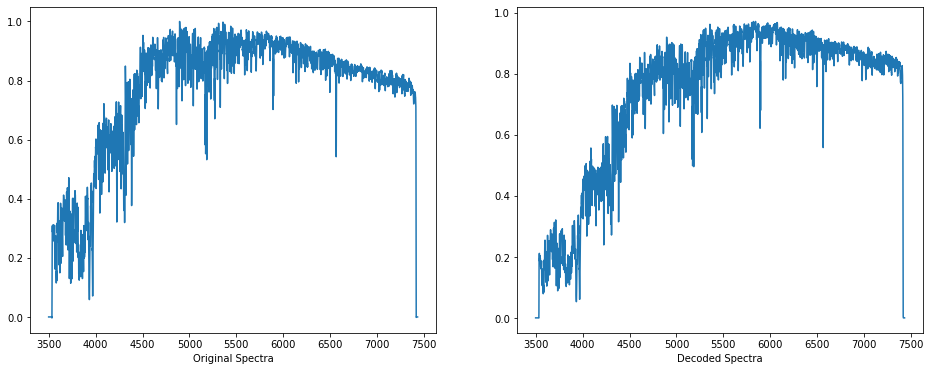

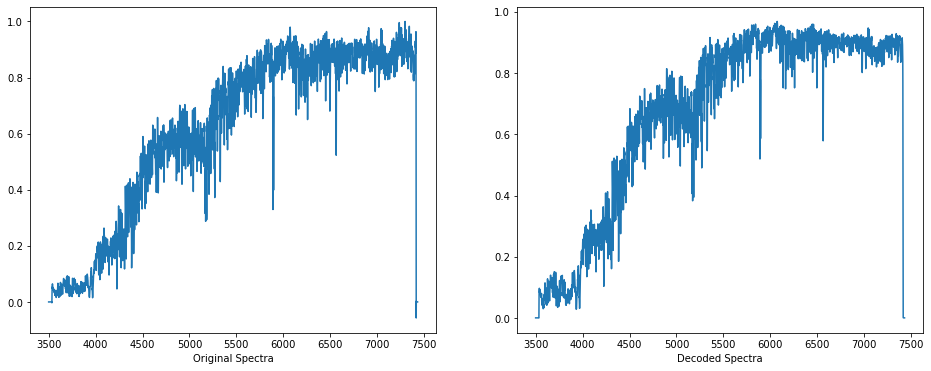

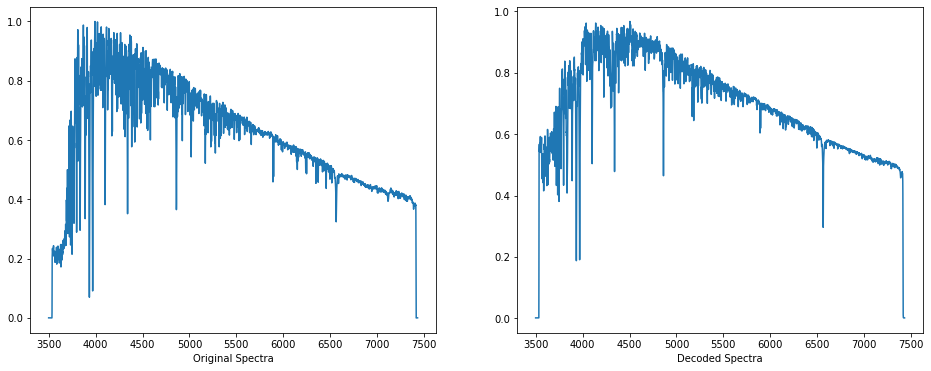

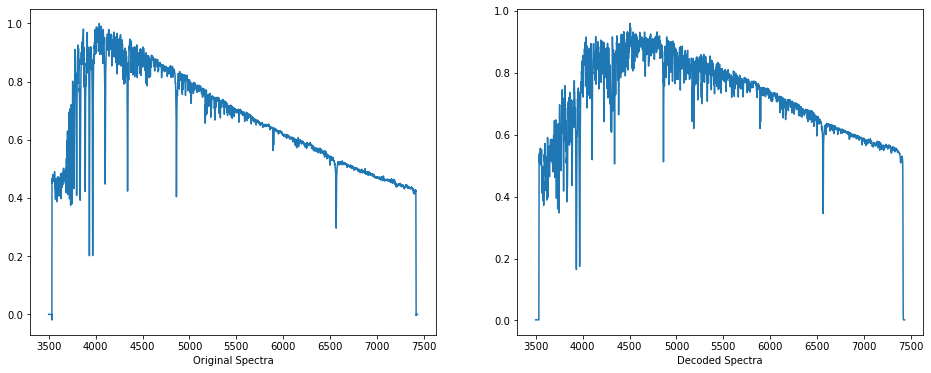

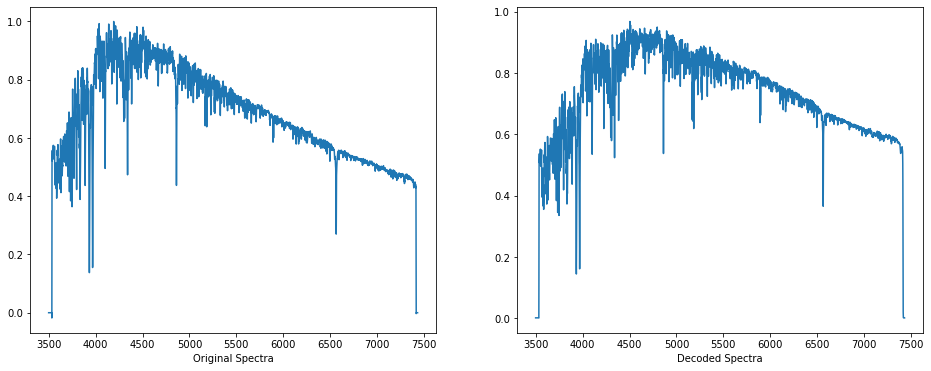

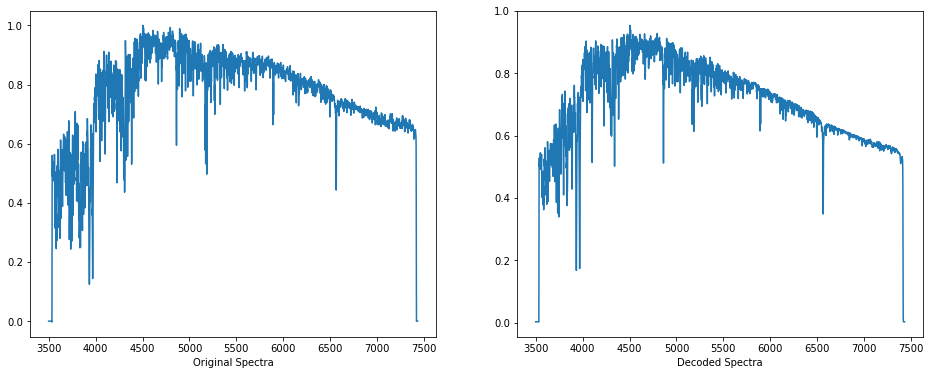

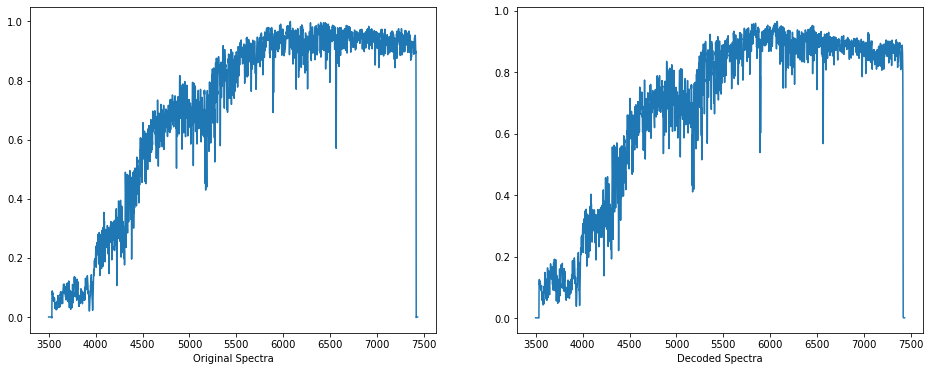

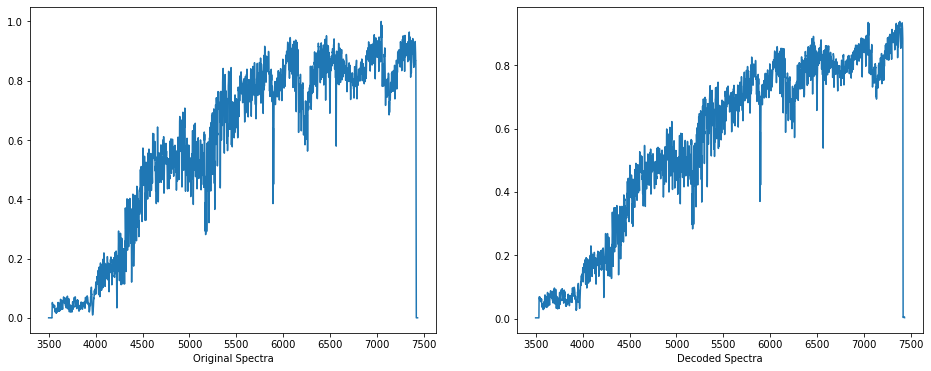

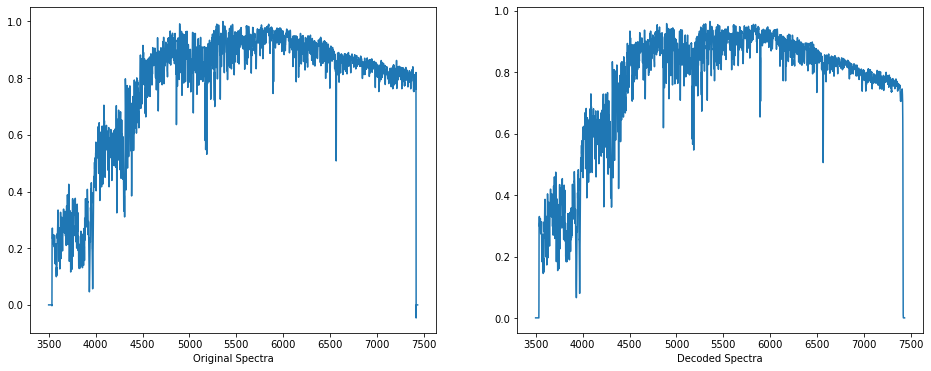

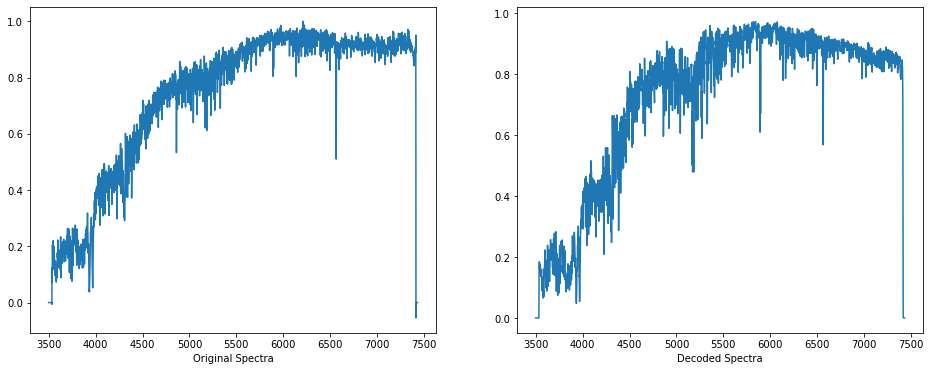

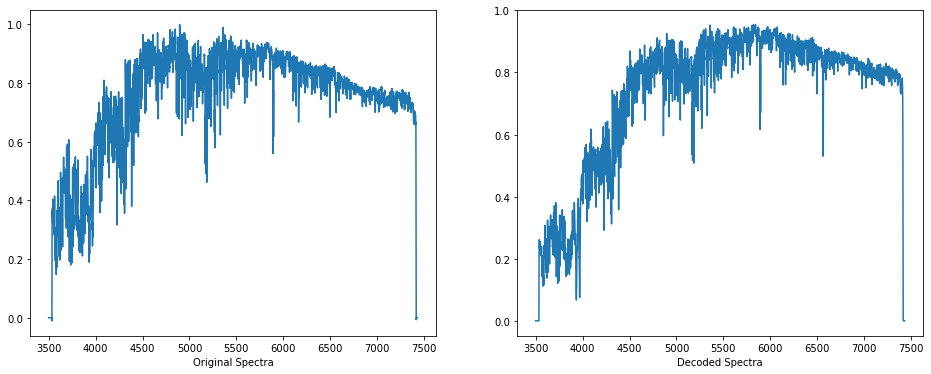

In [36]:
for m in range(20):
    figure = m
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].plot(wave2, x_test[figure])
    ax[0].set_xlabel('Original Spectra')   
    ax[1].plot(wave2, decoded_imgs_test[figure])
    ax[1].set_xlabel('Decoded Spectra')
plt.close(fig)

In [37]:
from sklearn.metrics import r2_score
r2_score(x_test, decoded_imgs_test, multioutput='variance_weighted')

0.8369596205069076

In [38]:
encoded_train = encoder(x_train)

In [39]:
encoded_imgs_train=encoded_train.numpy()

In [40]:
decoded_train = vae2(x_train)
decoded_imgs_train=decoded_train.numpy()

In [41]:
r2_score(x_train, decoded_imgs_train, multioutput='variance_weighted')

0.7978336899951

## Saving all

In [42]:
encoded_all = encoder(custom_set)
encoded_imgs_all=encoded_all.numpy()
encoded_imgs_all

array([[-0.25427413, -0.11451887, -0.11983433, -0.0034035 ],
       [-0.24646705, -0.14042006, -0.05658504,  0.02071462],
       [ 0.13919373,  0.14810945,  0.26140374, -0.2918687 ],
       ...,
       [-0.17028642, -0.05749464, -0.01852241,  0.09220476],
       [-0.01362864,  0.08471317, -0.01200876,  0.15116332],
       [ 0.09687857, -0.19342092,  0.4388171 , -0.3329321 ]],
      dtype=float32)

In [44]:
len(encoded_imgs_all)

985

In [ ]:
#calculating durations
latent_spectra = np.abs(np.fix(encoded_imgs_all*10).astype(int))
spectra_durations = [np.sum(latent_spectra[i]) for i in range (num)]
spectra_durations

In [ ]:
np.save('spectra_durations.npy', spectra_durations)

In [45]:
np.save('DeepVAE2_encoded_imgs_test.npy', encoded_imgs_test)

In [46]:
np.save('DeepVAE2_decoded_imgs_test.npy', decoded_imgs_test)

In [47]:
np.save('DeepVAE2_encoded_imgs_train.npy', encoded_imgs_train)

In [48]:
np.save('DeepVAE2_decoded_imgs_train.npy', decoded_imgs_train)

In [49]:
np.save('DeepVAE2_encoded_imgs_all.npy', encoded_imgs_all)

In [50]:
encoder.save('Miles_DeepVAE2_Encoder.tf', save_format='tf')

INFO:tensorflow:Assets written to: Miles_DeepVAE2_Encoder.tf/assets


In [51]:
encoder.save('Miles_DeepVAE2_Decoder.tf', save_format='tf')

INFO:tensorflow:Assets written to: Miles_DeepVAE2_Decoder.tf/assets


In [52]:
weights = vae2.get_weights()
vae2.save_weights('Miles_DeepVAE2_Weights', weights)

In [53]:
vae2.save('Miles_DeepVAE2.h5')

In [54]:
decoded_all = vae2(custom_set)
decoded_imgs_all=decoded_all.numpy()
decoded_imgs_all

array([[5.4935558e-04, 5.4950122e-04, 5.2316772e-04, ..., 5.5976055e-04,
        5.6366518e-04, 5.4034108e-04],
       [1.7397908e-03, 1.7392070e-03, 1.6907323e-03, ..., 1.8242024e-03,
        1.8247267e-03, 1.7320194e-03],
       [7.4922224e-04, 7.3268067e-04, 7.8272208e-04, ..., 2.5852963e-03,
        2.5285629e-03, 1.0335483e-03],
       ...,
       [2.7173245e-03, 2.7087478e-03, 2.6524088e-03, ..., 3.3159666e-03,
        3.3166225e-03, 2.8242064e-03],
       [3.1573316e-03, 3.1741625e-03, 3.1894273e-03, ..., 3.5508568e-03,
        3.5104488e-03, 3.3634766e-03],
       [2.4567904e-05, 2.3994982e-05, 2.6311935e-05, ..., 4.6676034e-03,
        4.1121761e-03, 9.4742092e-05]], dtype=float32)

In [55]:
np.save('DeepVAE2_decoded_imgs_all.npy', decoded_imgs_all)

In [58]:
np.save('x_axis', wave2)

In [59]:
np.save('Miles_x_train', x_train)

In [61]:
np.save('Miles_x_test', x_test)

In [62]:
np.save('Miles_all_spectra', custom_set)